In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter #The Collections module implements high-performance container datatypes (beyond
                                #the built-in types list, dict and tuple) and contains many useful data structures
                                #that you can use to store information in memory.





## DATASET

In [75]:
datatree = pd.read_csv(r"C:\Users\91628\Desktop\aeromit\archive (4).zip")
datatree

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [76]:
X = datatree.drop(columns=["quality"]).values  # Features
X


array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]],
      shape=(1599, 11))

In [77]:
y = datatree["quality"].values  # Target (classification labels)
y

array([5, 5, 5, ..., 6, 5, 6], shape=(1599,))

In [78]:
ratio = 0.80
total_rows = datatree.shape[0]
train_size = int(total_rows*ratio)
train_size

1279

In [79]:
train = datatree[0:train_size]
test = datatree[train_size:]
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1279,9.8,0.300,0.39,1.7,0.062,3.0,9.0,0.99480,3.14,0.57,11.5,7
1280,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1282,7.9,0.765,0.00,2.0,0.084,9.0,22.0,0.99619,3.33,0.68,10.9,6
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [80]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1274,7.8,0.580,0.13,2.1,0.102,17.0,36.0,0.99440,3.24,0.53,11.2,6
1275,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,6
1276,8.5,0.400,0.40,6.3,0.050,3.0,10.0,0.99566,3.28,0.56,12.0,4
1277,7.0,0.690,0.00,1.9,0.114,3.0,10.0,0.99636,3.35,0.60,9.7,6


In [81]:
X =(datatree[0:train_size]).values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 8.5  ,  0.4  ,  0.4  , ...,  0.56 , 12.   ,  4.   ],
       [ 7.   ,  0.69 ,  0.   , ...,  0.6  ,  9.7  ,  6.   ],
       [ 8.   ,  0.715,  0.22 , ...,  0.54 ,  9.5  ,  6.   ]],
      shape=(1279, 12))

## DECISION TREE MODEL

In [112]:
class nodes:
    def __init__(self, feature = None, threshold = None, left = None, right = None, value = None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value   #if it is a leaf node, otherwise it is going to be none

    def leaf_node(self):
        return self.value is not None


class decisiontree:
    def __init__(self, min_sample_split = 2, max_depth = 100, n_features = None):
        self.min_samples_split =  min_sample_split
        self.max_depth =  max_depth
        self.n_features = n_features
        self.root = None

#when we are at fit we check that the no of features is not more than the actual features

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X,y)
#we call grow tree, checks the best feature
    def _grow_tree(self, X, y, depth = 0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))
        #check terminating criteria (1. first checks the stopping criteria)
        if (depth>= self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            
            return nodes(value=leaf_value)
        feat_idx = np.random.choice(n_feats, self.n_features, replace = False)    #checks best feature
        

        #find the best split (2. and then calls best split)
        best_feature, best_thresh = self._best_split(X, y, feat_idx)

         # Split the data
        left_mask = X[:, best_feature] <= best_thresh
        right_mask = ~left_mask  # Invert mask for right split

        X_left, y_left = X[left_mask], y[left_mask]
        X_right, y_right = X[right_mask], y[right_mask]

    # Recursively create child nodes
        left_child = self._grow_tree(X_left, y_left, depth + 1)
        right_child = self._grow_tree(X_right, y_right, depth + 1)

    # Return node with children
        return nodes(feature=best_feature, threshold=best_thresh, left=left_child, right=right_child)
 
#and then the best split calls information gain
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for thresh in thresholds:
                #cal info gain
                gain = self._information_gain(y, X_column, thresh)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thresh
        print(f"Best feature index: {split_idx}, Best threshold: {split_threshold}")

        if split_idx is None or split_threshold is None:
            raise ValueError("No valid split found. Check the data or the splitting criteria.")

        
        return split_idx, split_threshold

    def _gini(self, y):
        total_samples = len(y)
        if total_samples == 0:
            return 0
        counter = Counter(y)
        probabilities = np.array([count / total_samples for count in counter.values()])
        return 1 - np.sum(probabilities ** 2)
        
        #weighted avg gini index of leaf
    def _weighted_gini(self, y_left, y_right):
        n_left, n_right = len(y_left), len(y_right)
        total_samples = n_left + n_right

        gini_left = self._gini(y_left)
        gini_right = self._gini(y_right)

        weighted_gini = (n_left / total_samples) * gini_left + (n_right / total_samples) * gini_right
        return weighted_gini
     
        #calc info gain (information gain then calls parent gini, splits it based on the threshold, then it is passed back to best split)
    def _information_gain(self, y, X_column, threshold):
        """Calculates Information Gain by comparing parent Gini with weighted child Gini."""
        parent_gini = self._gini(y)

        # Splitting data based on threshold
        left_mask = X_column <= threshold
        y_left, y_right = y[left_mask], y[~left_mask]

        # Compute weighted Gini index
        weighted_gini = self._weighted_gini(y_left, y_right)

        # Information gain = reduction in impurity
        info_gain = parent_gini - weighted_gini
        return info_gain
        print(info_gain)
    
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.leaf_node():
            return node.value

        if x[node.feature]<= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value


In [83]:
features = ["fixed acidity",	"volatile acidity",	"citric acid",	"residual sugar",	"chlorides",	"free sulfur dioxide",	"total sulfur dioxide",	"density	pH",	"sulphates",	"alcohol",	"quality"]
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density\tpH',
 'sulphates',
 'alcohol',
 'quality']

## ACCURACY ON SKLEARN

In [111]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
data = datasets.load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#a random state parameter  is used to control the randomness of certain operations, we use it so that the values don't change everytime we run it
#changing random state changes the way how the data is being split
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred)/len(y_test)
acc = accuracy(y_test, predictions)
print(acc)

0.9385964912280702


## ACCURACY ON MODEL

In [113]:
clf = decisiontree(min_sample_split = 2, max_depth = 5, n_features = X.shape[1])
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred)/len(y_true)
acc = accuracy(y_test, predictions)
print("the tree accuracy is", acc)

Best feature index: 7, Best threshold: 0.05074
Best feature index: 20, Best threshold: 16.77
Best feature index: 13, Best threshold: 48.29
Best feature index: 24, Best threshold: 0.1768
Best feature index: 14, Best threshold: 0.00328
Best feature index: 15, Best threshold: 0.01094
Best feature index: 21, Best threshold: 19.58
Best feature index: 17, Best threshold: 0.009921
Best feature index: 27, Best threshold: 0.1465
Best feature index: 22, Best threshold: 114.3
Best feature index: 21, Best threshold: 27.2
Best feature index: 19, Best threshold: 0.01284
the tree accuracy is 0.9298245614035088


In [92]:
feature_names = ["fixed acidity",	"volatile acidity",	"citric acid",	"residual sugar",	"chlorides",	"free sulfur dioxide",	"total sulfur dioxide",	"density	pH",	"sulphates",	"alcohol",	"quality"]


## PLOT FOR OUR DECISION TREE MODEL

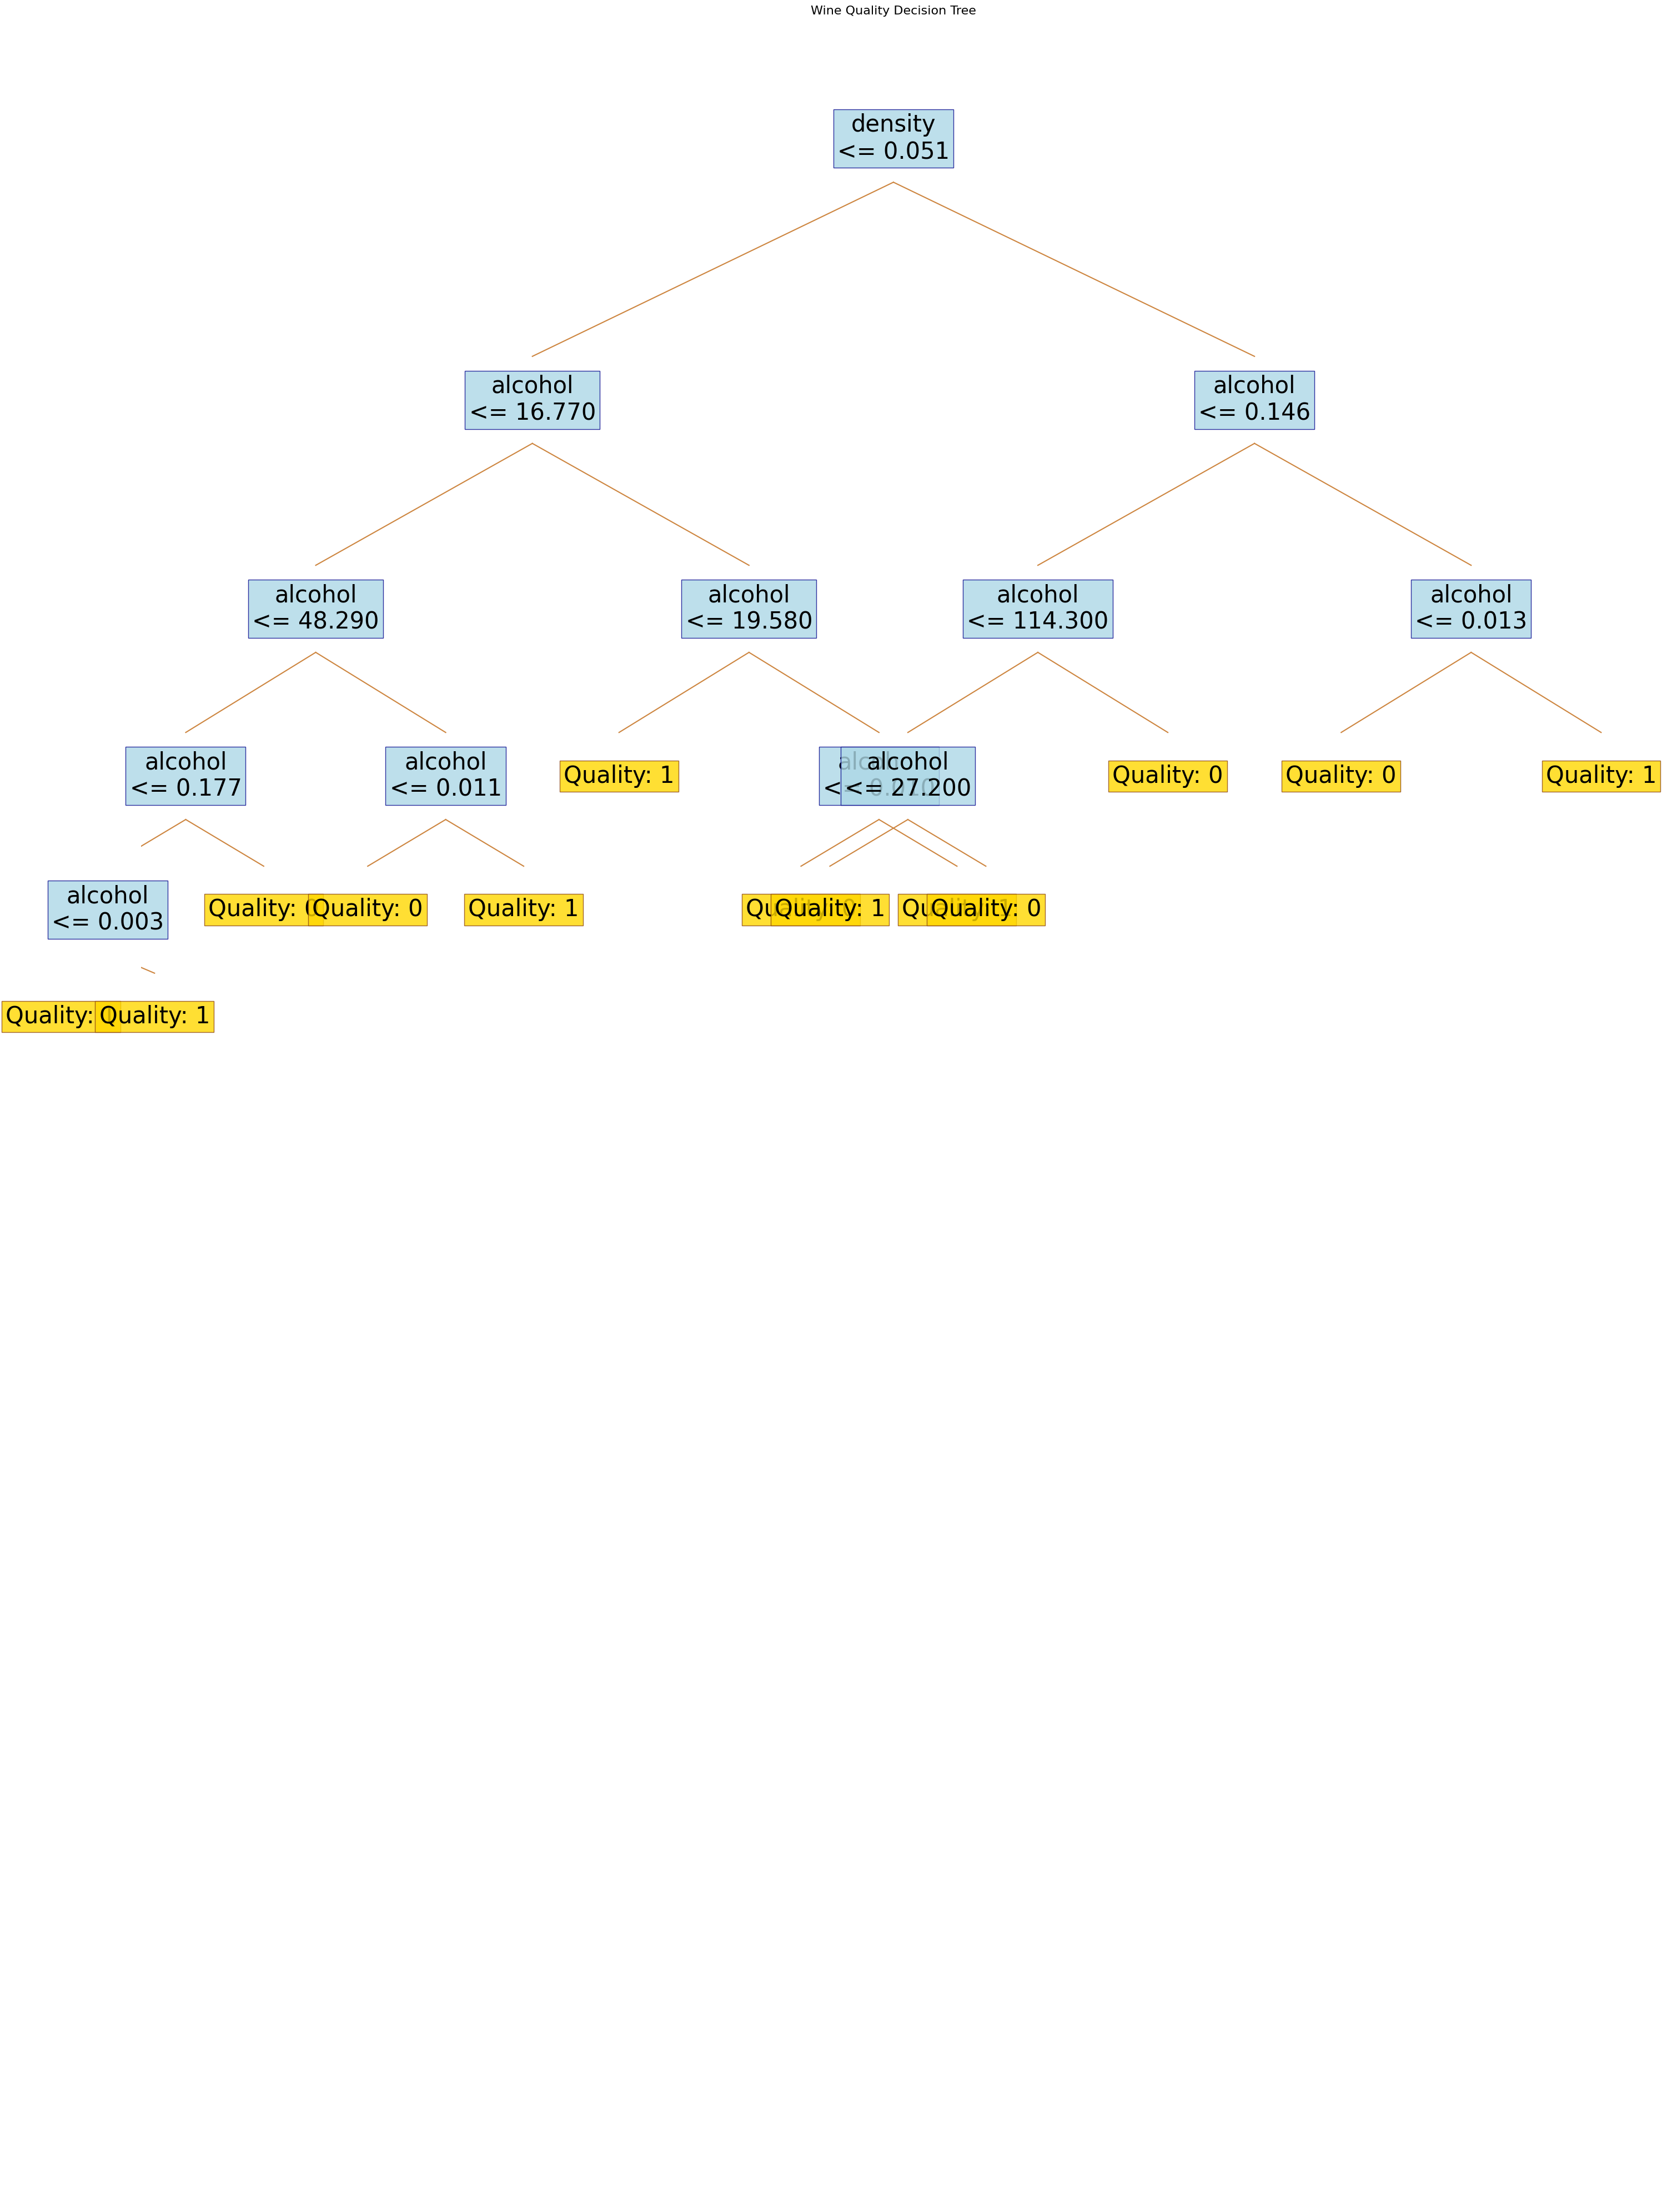

In [114]:
def plot_wine_tree(tree, figsize=(30, 40)):
    import matplotlib.pyplot as plt

    wine_features = [
        'fixed acidity', 'volatile acidity', 'citric acid',
        'residual sugar', 'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates',
        'alcohol'
    ]
    fig, ax = plt.subplots(figsize=figsize)

    leaf = {
        'bbox': dict(facecolor='gold', edgecolor='saddlebrown', alpha=0.8, pad=5),
        'ha': 'center', 
        'va': 'center',
        'fontsize': 30
    }
    
    node = {
        'bbox': dict(facecolor='lightblue', edgecolor='darkblue', alpha=0.8, pad=5),
        'ha': 'center',
        'va': 'center',
        'fontsize': 30
    }
    
    def _plot_node(node, x, y, dx, dy):
        if node is None:
            return
            
        if node.leaf_node():
            ax.text(x, y, f"Quality: {node.value}", **leaf)
            return
            
        # Safe feature index handling
        feat_idx = min(node.feature, len(wine_features)-1)
        feature_name = wine_features[feat_idx]
        
        ax.text(x, y, f"{feature_name}\n<= {node.threshold:.3f}", **node_kwargs)
        
        new_dy = dy * 0.8
        new_dx = dx * 0.6
        
        if node.left:
            ax.plot([x, x-new_dx], [y-0.02, y-new_dy+0.02], 
                   color='peru', linestyle='-', linewidth=1.5)
            _plot_node(node.left, x-new_dx, y-new_dy, new_dx, new_dy)
            
        if node.right:
            ax.plot([x, x+new_dx], [y-0.02, y-new_dy+0.02], 
                   color='peru', linestyle='-', linewidth=1.5)
            _plot_node(node.right, x+new_dx, y-new_dy, new_dx, new_dy)
    
    # Plot with error handling
    try:
        if hasattr(tree, 'root') and tree.root:
            _plot_node(tree.root, x=0.5, y=0.95, dx=0.4, dy=0.15)
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis('off')
            plt.title("Wine Quality Decision Tree", pad=20, fontsize=16)
            plt.tight_layout()
            plt.show()
        else:
            print("⚠️ Train your tree first using fit()")
    except Exception as e:
        plt.close()
        print(f"❌ Error: {str(e)}")

# Usage:
plot_wine_tree_compatible(clf)

## WHAT WE ARE DOING IN THIS PROGRAM FOR DECISION TREES:

### 1. Data Loading and Preprocessing 
   - The dataset is read from a CSV file into a Pandas DataFrame.  
   - The feature matrix (`X`) is extracted by dropping the `"quality"` column, which serves as the target variable (`y`).  
   - The dataset is split into training (80%) and testing (20%) sets based on row indices.

### 2. Node Class (`nodes`)
   - Defines a `nodes` class representing a tree node with attributes:  
     - `feature`: The index of the feature used for splitting.  
     - `threshold`: The value at which the feature is split.  
     - `left` and `right`: Child nodes for the split.  
     - `value`: The predicted class (only for leaf nodes).  EITHER 0 OR 1

### 3. Decision Tree Construction
   - A recursive function builds the tree:  
     - Finds the best feature and threshold to split on by evaluating information gain (using Gini impurity).  
     - Internal nodes with left and right children are created based on the split.  
     - Stops splitting when a stopping criterion is met (e.g., minimum number of samples in a node or zero information gain).  
     - Creates a leaf node with the most common class label when further splitting isn’t beneficial.

### 4. Prediction Function 
   - Recursively traverses the tree, comparing feature values against thresholds to determine which child node to follow.  
   - Reaches a leaf node and assigns its stored class label as the final prediction.  

### 5. Model Evaluation
   - The trained tree is used to classify test data.  
   - Predictions are compared with actual labels to compute accuracy.  